## Google stock prediction using financial analytics models

## FBProphet

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

In [50]:
df = pdr.get_data_yahoo("GOOG", start="2005-01-05")

In [51]:
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [52]:
model=Prophet()

In [53]:
df=df[['ds','y']]

In [54]:
df

,ds,y
0,2005-01-05,96.393692
1,2005-01-06,93.922951
2,2005-01-07,96.563057
3,2005-01-10,97.165802
4,2005-01-11,96.408638
...,...,...
4092,2021-04-09,2285.879883
4093,2021-04-12,2254.790039
4094,2021-04-13,2267.270020
4095,2021-04-14,2254.840088


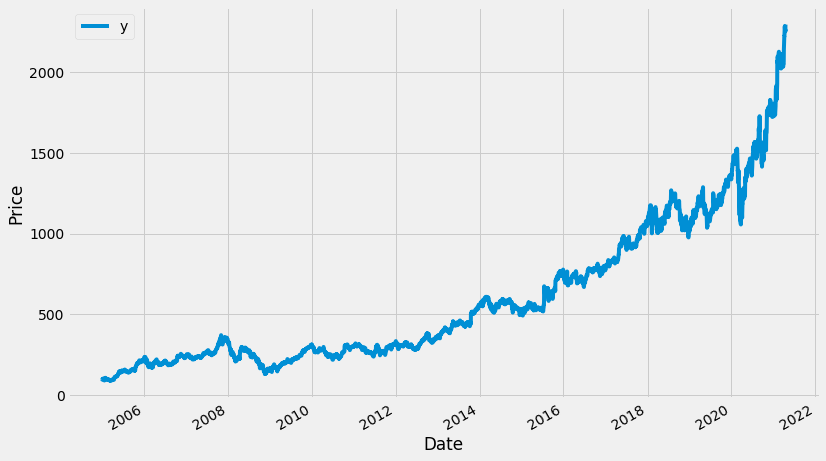

In [55]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [56]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future=model.make_future_dataframe(periods=165)

In [58]:
future.tail()

,ds
4257,2021-09-23
4258,2021-09-24
4259,2021-09-25
4260,2021-09-26
4261,2021-09-27


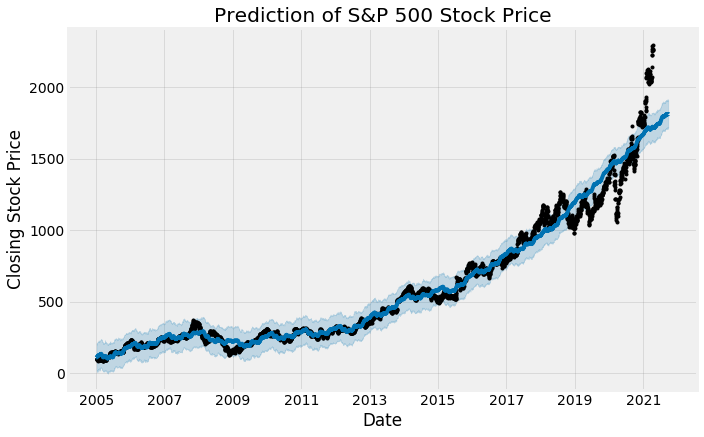

,ds,yhat,yhat_lower,yhat_upper
4257,2021-09-23,1811.453114,1715.673206,1913.224261
4258,2021-09-24,1810.099930,1706.718483,1900.730700
4259,2021-09-25,1811.275980,1719.791333,1906.244144
4260,2021-09-26,1811.741483,1719.401481,1908.344201
4261,2021-09-27,1811.138951,1716.621478,1907.855457


In [59]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of S&P 500 Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

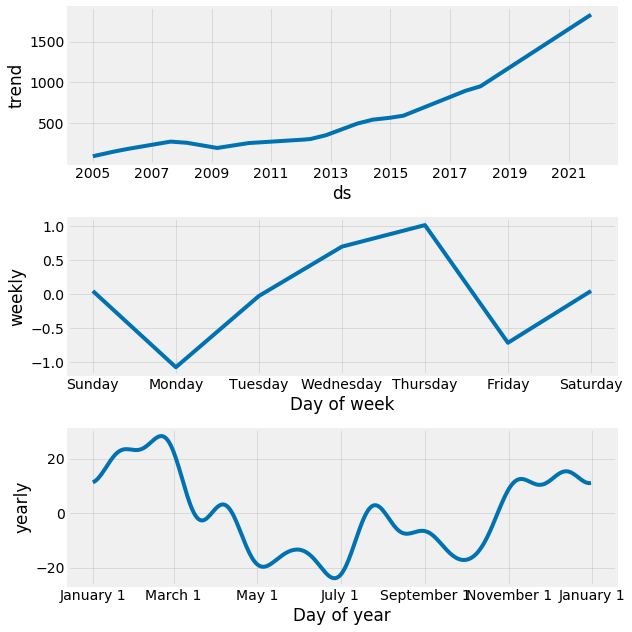

In [60]:
model.plot_components(predictions)
plt.show()

In [61]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4257,2021-09-23,1811.453114,1712.167207,1909.552417
4258,2021-09-24,1810.099930,1708.547737,1909.270747
4259,2021-09-25,1811.275980,1707.717908,1908.380511
4260,2021-09-26,1811.741483,1717.418625,1909.007965
4261,2021-09-27,1811.138951,1709.498185,1912.657382


## LSTM

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

In [63]:
from pandas_datareader import data as pdr

In [175]:
df = pdr.get_data_yahoo("GOOG", start="2005-01-05")

In [176]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-05,98.082359,95.756081,96.363808,96.393692,16534946.0,96.393692
2005-01-06,97.584229,93.509506,97.175758,93.922951,20852067.0,93.922951
2005-01-07,96.762314,94.037521,94.964050,96.563057,19398238.0,96.563057
2005-01-10,98.680122,95.556831,96.886841,97.165802,15135721.0,97.165802
2005-01-11,98.485847,96.229309,97.444756,96.408638,13969566.0,96.408638


In [177]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-09,2289.040039,2253.714111,2256.699951,2285.879883,1043600.0,2285.879883
2021-04-12,2275.320068,2238.465088,2266.250000,2254.790039,1565900.0,2254.790039
2021-04-13,2277.209961,2256.090088,2261.469971,2267.270020,1165500.0,2267.270020
2021-04-14,2277.989990,2249.189941,2275.159912,2254.840088,1009300.0,2254.840088
2021-04-15,2306.596436,2266.000000,2276.979980,2296.659912,1155783.0,2296.659912


In [178]:
df = df['Open'].values
df= df.reshape(-1, 1)
print(df.shape)
df[:5]

(4097, 1)


array([[96.36380768],
       [97.17575836],
       [94.96405029],
       [96.88684082],
       [97.44475555]])

In [179]:
dtrain = np.array(df[:int(df.shape[0]*0.8)])
dtest = np.array(df[int(df.shape[0]*0.8)-50:])

In [180]:
dtrain.shape

(3277, 1)

In [181]:
dtest.shape

(870, 1)

In [182]:
scaler = MinMaxScaler(feature_range=(0,1))
dtrain = scaler.fit_transform(dtrain)
dtrain[:5]

array([[0.00884582],
       [0.00964023],
       [0.0074763 ],
       [0.00935756],
       [0.00990342]])

In [183]:
dtest = scaler.transform(dtest)
dtest[:5]

array([[0.90666066],
       [0.90785428],
       [0.90980134],
       [0.91425305],
       [0.91459547]])

In [184]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [185]:
x_train, y_train = create_dataset(dtrain)
x_train[:1]

array([[0.00884582, 0.00964023, 0.0074763 , 0.00935756, 0.00990342,
        0.00927471, 0.00978645, 0.01008862, 0.01251086, 0.0143044 ,
        0.00838282, 0.00937706, 0.00652592, 0.00323616, 0.00193487,
        0.00656004, 0.00717413, 0.00896279, 0.00929907, 0.01961676,
        0.01495748, 0.01519142, 0.0146017 , 0.0105565 , 0.01240852,
        0.00812451, 0.00553656, 0.00367967, 0.00891892, 0.00945504,
        0.01098051, 0.01131192, 0.01033231, 0.00877271, 0.0039331 ,
        0.00675011, 0.00521489, 0.00681835, 0.00519052, 0.00527825,
        0.00555606, 0.00608241, 0.00672575, 0.00434249, 0.0027829 ,
        0.0025051 , 0.00147674, 0.        , 0.00068232, 0.00089189]])

In [186]:
x_test, y_test = create_dataset(dtest)
x_test[:1]

array([[0.90666066, 0.90785428, 0.90980134, 0.91425305, 0.91459547,
        0.92132686, 0.91964404, 0.92282384, 0.92621886, 0.91885148,
        0.91587717, 0.91506514, 0.91175814, 0.91499664, 0.92623844,
        0.91278545, 0.91576956, 0.92720705, 0.92805825, 0.93209905,
        0.94686306, 0.93472121, 0.91484986, 0.90842177, 0.90534958,
        0.88899077, 0.89443066, 0.91295176, 0.92964326, 0.92769625,
        0.93173704, 0.93808685, 0.93699105, 0.94639345, 0.95761566,
        0.96653866, 0.96319261, 0.95651007, 0.95275305, 0.94977867,
        0.94911343, 0.94344846, 0.93867386, 0.94025887, 0.955884  ,
        0.97906223, 0.98493262, 0.99298483, 1.        , 0.98796564]])

In [187]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [188]:
import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [189]:
model = Sequential()

In [190]:
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))

In [191]:
model.add(Dense(units=1))

In [192]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [193]:
model.fit(x_train, y_train, epochs=20, batch_size=5)

Epoch 1/20
646/646 [==============================] - 73s 105ms/step - loss: 0.0087
Epoch 2/20
646/646 [==============================] - 72s 112ms/step - loss: 0.0038
Epoch 3/20
646/646 [==============================] - 78s 120ms/step - loss: 0.0031
Epoch 4/20
646/646 [==============================] - 78s 121ms/step - loss: 0.0021
Epoch 5/20
646/646 [==============================] - 76s 118ms/step - loss: 0.0016
Epoch 6/20
646/646 [==============================] - 79s 122ms/step - loss: 0.0017
Epoch 7/20
646/646 [==============================] - 81s 125ms/step - loss: 0.0012
Epoch 8/20
646/646 [==============================] - 79s 122ms/step - loss: 0.0010
Epoch 9/20
646/646 [==============================] - 77s 120ms/step - loss: 0.0010
Epoch 10/20
646/646 [==============================] - 77s 119ms/step - loss: 9.3634e-04
Epoch 11/20
646/646 [==============================] - 78s 120ms/step - loss: 9.8986e-04
Epoch 12/20
646/646 [==============================] - 77s 120ms/s

In [194]:
predictions = model.predict(x_test)

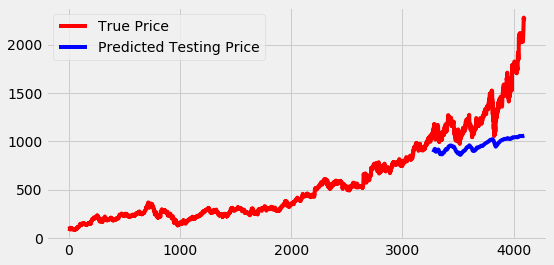

In [195]:
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

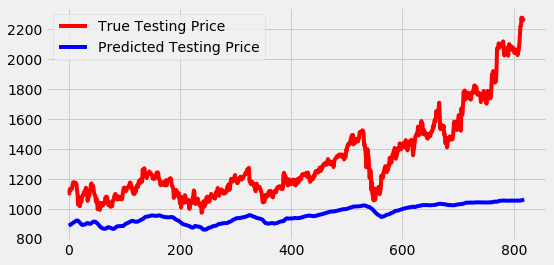

In [196]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [197]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[1060.0774, 882.6374, 1103.4174, 938.41187, 1092.377]


In [198]:
score = model.evaluate(x_test, y_test)

26/26 [==============================] - 1s 19ms/step - loss: 0.1827


In [199]:
import math

In [200]:
MSE = score
RMSE = math.sqrt(score)

In [201]:
MSE

0.18265803158283234

In [202]:
RMSE

0.427385109219814

## Exponential Smoothing

In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [148]:
df = pdr.get_data_yahoo("GOOG", start="2005-01-05")

In [149]:
df=df.drop(['High','Low','Open','Volume','Adj Close',], axis=1)
df

,Close
Date,
2005-01-05,96.393692
2005-01-06,93.922951
2005-01-07,96.563057
2005-01-10,97.165802
2005-01-11,96.408638
...,...
2021-04-09,2285.879883
2021-04-12,2254.790039
2021-04-13,2267.270020


In [150]:
#Splitting the data into traing and testing
train=df[0:-12] 
test=df[-12:]

MAE 163.33
MSE 32,873.21
RMSE 181.31


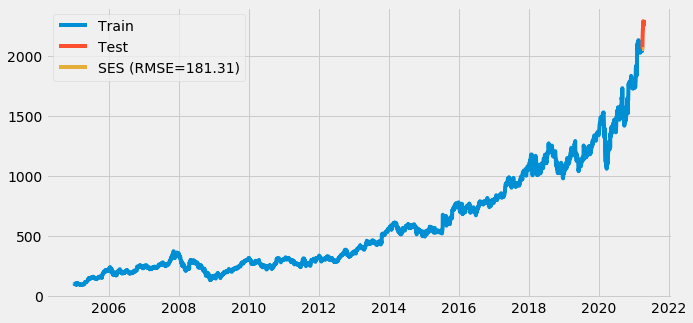

In [156]:
# Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit= SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.8,optimized=False)# alpha=0.8
pred['SES'] = fit.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Close, pred.SES)
mse= mean_squared_error(test.Close, pred.SES)
rmse = sqrt(mean_squared_error(test.Close, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse)) 
plt.legend()
plt.show()

MAE 192.74
MSE 44,347.26
RMSE 210.59


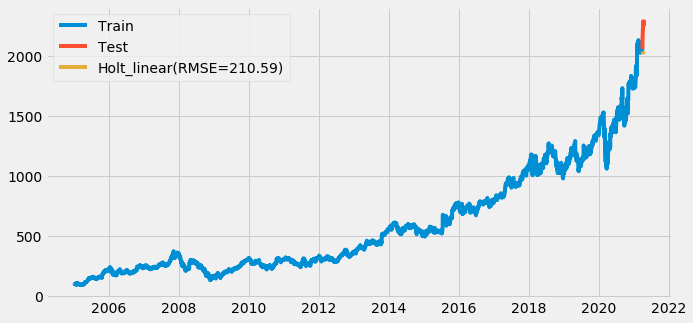

In [157]:
#Double Exponential Smoothing (Holt Linear)
# Fit the model
pred = test.copy()
fit = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.4)
pred['Holt_linear'] = fit.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.Close, pred.Holt_linear)
mse=mean_squared_error(test.Close, pred.Holt_linear)
rmse = sqrt(mean_squared_error(test.Close, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

MAE 155.85
MSE 30,071.88
RMSE 173.41


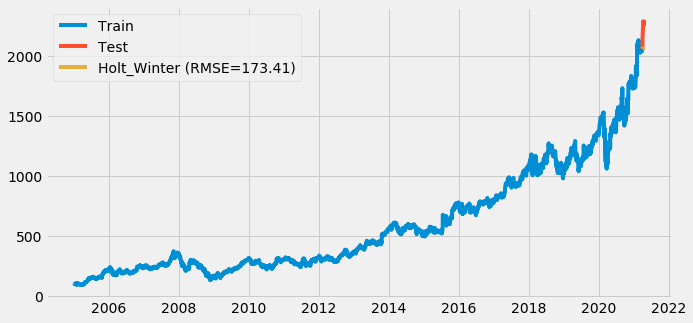

In [160]:
# Triple Exponential Smoothing (Holt Winter)
# Fit the model
pred = test.copy()
fit = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Close, pred.Holt_Winter)
mse=mean_squared_error(test.Close, pred.Holt_Winter)
rmse = sqrt(mean_squared_error(test.Close, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(10,5))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))

plt.legend()
plt.show()

## Simple Moving Average

In [162]:
import datetime
from tabulate import tabulate

In [163]:
df = pdr.get_data_yahoo("GOOG", start="2005-01-05")

In [164]:
df=df.drop(['High','Low','Open','Volume','Adj Close',], axis=1)
df

,Close
Date,
2005-01-05,96.393692
2005-01-06,93.922951
2005-01-07,96.563057
2005-01-10,97.165802
2005-01-11,96.408638
...,...
2021-04-09,2285.879883
2021-04-12,2254.790039
2021-04-13,2267.270020


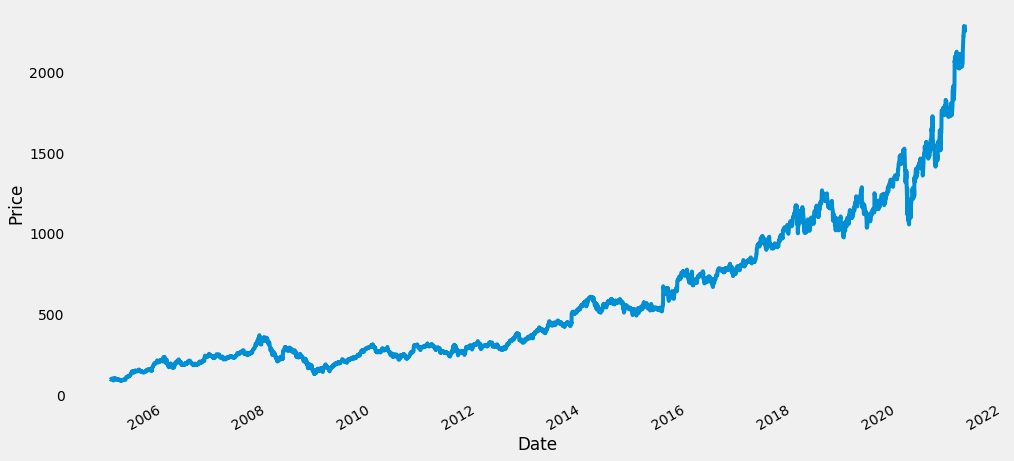

In [166]:
df['Close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

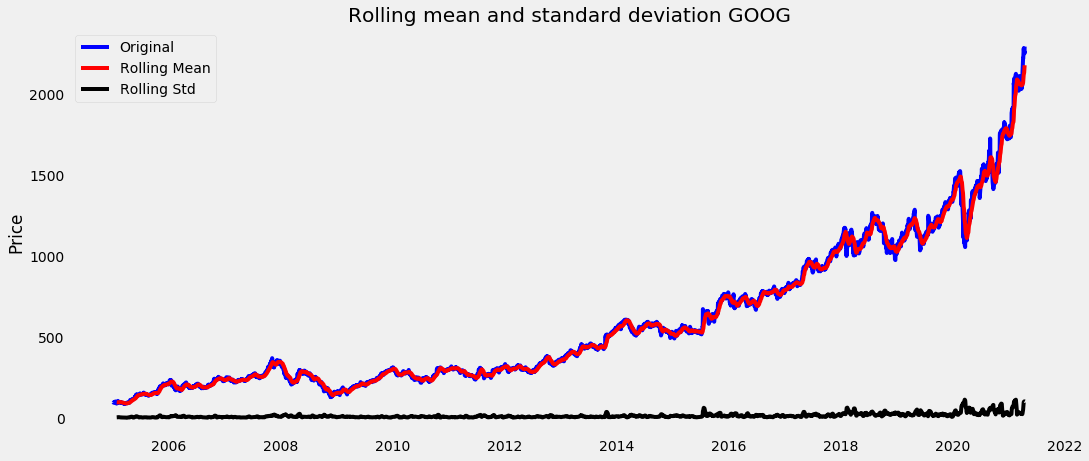

In [167]:
rolling_mean = df['Close'].rolling(15).mean()
rolling_std = df['Close'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation GOOG' )
plt.grid()
plt.ylabel("Price")
plt.show()

In [168]:
# create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

,Close,SMA20,SMA50
Date,,,
2005-01-05,96.393692,96.393692,96.393692
2005-01-06,93.922951,95.158321,95.158321
2005-01-07,96.563057,95.626567,95.626567
2005-01-10,97.165802,96.011375,96.011375
2005-01-11,96.408638,96.090828,96.090828


## Trade signals
<br>

###### When the short term moving average crosses above the long term moving average, this indicates a buy signal.
###### Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [169]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [170]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2005-01-05,96.393692,96.393692,96.393692,0.0,NaN
2005-01-06,93.922951,95.158321,95.158321,0.0,0.0
2005-01-07,96.563057,95.626567,95.626567,0.0,0.0
2005-01-10,97.165802,96.011375,96.011375,0.0,0.0
2005-01-11,96.408638,96.090828,96.090828,0.0,0.0


In [172]:
myticker='GOOG'

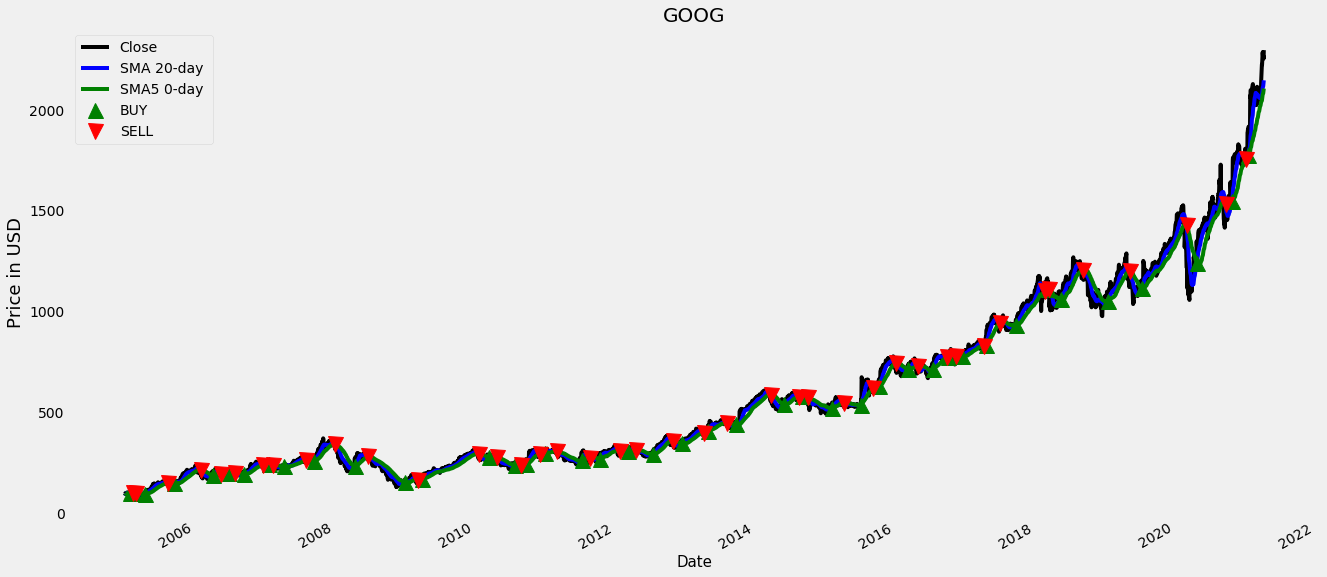

In [173]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [174]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+-----------+-----------+-----------+----------+------------+
| Date                |     Close |     SMA20 |     SMA50 |   Signal | Position   |
|---------------------+-----------+-----------+-----------+----------+------------|
| 2005-02-03 00:00:00 |  105.036  |   96.5113 |   96.5057 |        1 | Buy        |
| 2005-02-14 00:00:00 |   96.1347 |   96.444  |   96.5561 |        0 | Sell       |
| 2005-02-22 00:00:00 |   95.3277 |   96.8609 |   96.7324 |        1 | Buy        |
| 2005-03-04 00:00:00 |   92.6029 |   95.6587 |   96.0925 |        0 | Sell       |
| 2005-04-20 00:00:00 |   98.6801 |   93.2044 |   93.0871 |        1 | Buy        |
| 2005-08-18 00:00:00 |  139.472  |  145.149  |  145.71   |        0 | Sell       |
| 2005-09-20 00:00:00 |  153.38   |  146.455  |  146.351  |        1 | Buy        |
| 2006-02-08 00:00:00 |  183.851  |  211.25   |  211.663  |        0 | Sell       |
| 2006-04-10 00:00:00 |  207.413  |  185.96   |  185.098  |        1 | Buy  

C:\Users\sneha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## ARIMA

In [203]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [204]:
df = pdr.get_data_yahoo("GOOG", start="2005-01-05")

In [205]:
df=df.drop(['High','Low','Open','Volume','Adj Close',], axis=1)
df

,Close
Date,
2005-01-05,96.393692
2005-01-06,93.922951
2005-01-07,96.563057
2005-01-10,97.165802
2005-01-11,96.408638
...,...
2021-04-09,2285.879883
2021-04-12,2254.790039
2021-04-13,2267.270020


In [206]:
df = df.groupby('Date')['Close'].sum().reset_index()

In [207]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2005-01-05', '2005-01-06', '2005-01-07', '2005-01-10',
               '2005-01-11', '2005-01-12', '2005-01-13', '2005-01-14',
               '2005-01-18', '2005-01-19',
               ...
               '2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15'],
              dtype='datetime64[ns]', name='Date', length=4097, freq=None)

In [208]:
df.index = pd.to_datetime(df.index)

monthly_mean = df.Close.resample('M').mean()

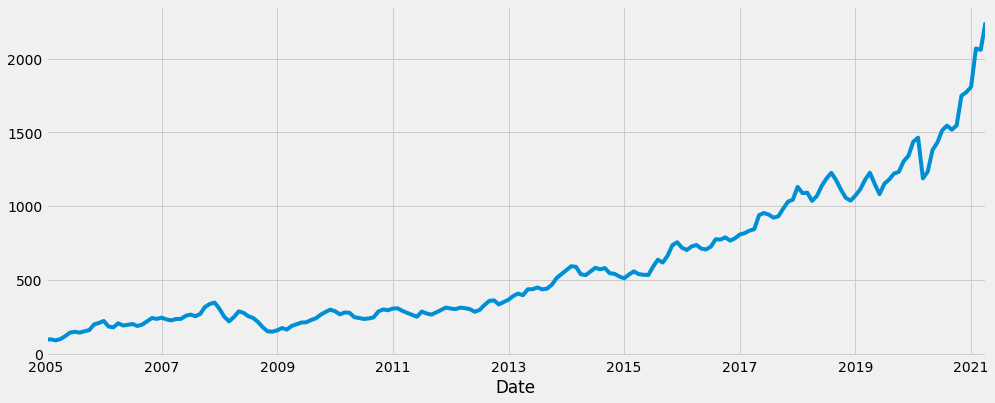

In [209]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

In [210]:
import statsmodels.api as sm

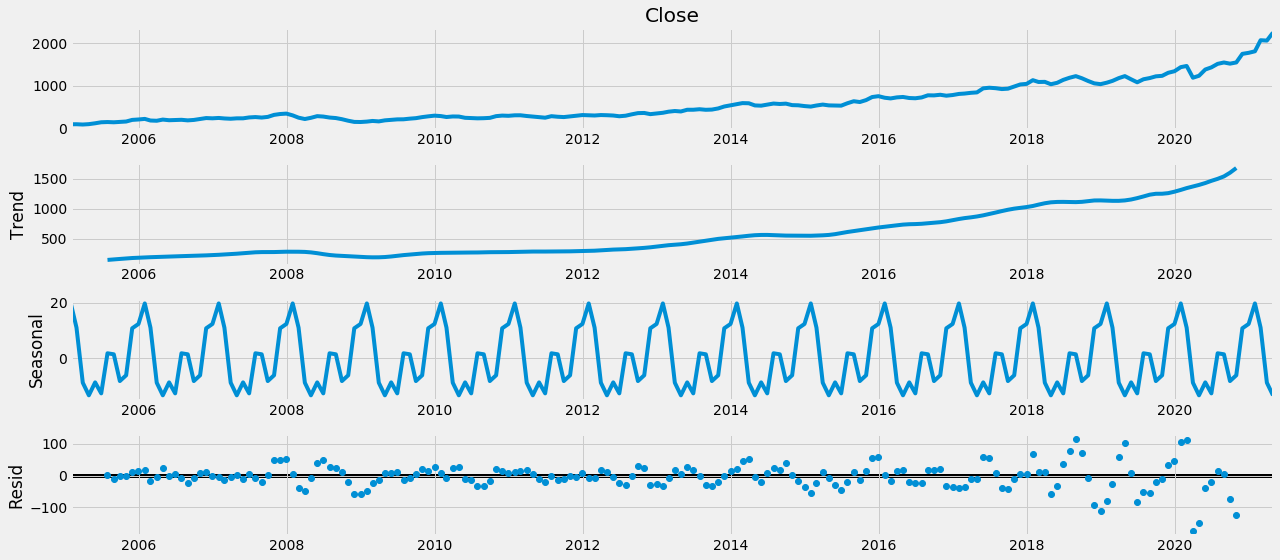

In [211]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [213]:
import itertools

In [214]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [215]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3135.606881922365
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2784.8276595960733
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2423.0362269173215
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2266.712557865528
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2300.985138605172
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2227.4600827361837
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2266.6288824549038
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2181.7504542969
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2868.7889089806667
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2540.378991466965
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2212.207357352767
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2070.7025081726724
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2133.1831596565485
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2066.7837785686906
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2089.074709078805
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2013.8984205582449
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2042.5371053192669
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1927.9895202077223
A

C:\Users\sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1915.8702288397653
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2019.1124799895656
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1816.9838299222038
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1915.8343623238338
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1917.8293446816167
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1829.25265775613
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1818.7679410139644
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2020.5082804080528


C:\Users\sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1908.3437504349977
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1972.7928524245265
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1807.869479650712
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1917.690474055603
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1909.3112696764765
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1828.4408711316564
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1809.7929723397956
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2038.5981209162849
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1923.4945419092767
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1985.4168754472394
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1813.3231515340378
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1923.0868054488935
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1924.9050521503696
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1820.2327320279276
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1815.186518808534
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2026.9783082522854
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1911.780630612387
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1962.8372903048

In [216]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [217]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5585      0.153     -3.658      0.000      -0.858      -0.259
ma.L1          0.7832      0.133      5.869      0.000       0.522       1.045
ma.S.L12      -0.7495      0.076     -9.857      0.000      -0.899      -0.600
sigma2      2310.4766    115.679     19.973      0.000    2083.750    2537.204


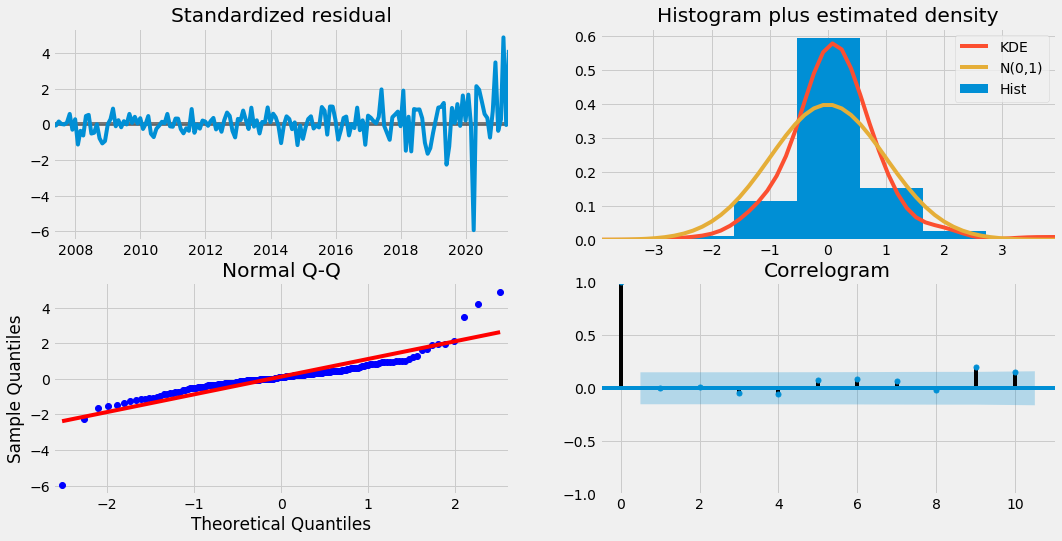

In [218]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()